## Final Project Submission

Please fill out:
* Student name: GRACE KOKI MUTUKU
* Student pace: FULL TIME
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Creating Movies at Microsoft

# 1. Business Undestanding

## 1.1 Overview
Microsoft Corporation, a multinational technology corporation best known for software products has decided to diversify into creating original video content.They have decided to start a new movie studio, and would like to understand the insights that data has to offer concerning this new venture. Big companies have started this new venture and Microsoft would not like to be left behind. However Microsoft has no prior knowlegde on running a film studio or creating original video content. 

A film studio also known as a movie studio or a production studio often operates in the entertainment and media industry. It has has the creative components of a film and television production as well as the privately-owned facilities used to shoot films. The business domain of a movie studio has a wide range of activities and services geared to the creation, development, production, and distribution of films.It is a highly dynamic and competitive domain, with studios constantly seeking to create compelling content that not only appeals to audiences worldwide but also generates huge profits. Additionally, the industry has seen significant changes in recent years with the rise of streaming platforms, which have had a profound impact on how content is produced, distributed, and consumed.

The establishment of a movie studio presents a compelling opportunity to enter the dynamic entertainment industry. With a well-planned approach, strategic investment, and a commitment to high-quality content, this newbut can achieve long-term success, considering the vast Microsoft brand recognition, and profitability. 


## 1.2 Business Understanding

The task is to explore what types of films are currently doing the best at the box office and then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create. The objectives of this exploratory data analysis are:

   
        i. To access what movie genres are profitable
       ii. To determine the relationship between expenditure and profit
      iii. To identify the most profitable movie genres
       iv.  To access the profits of other movie studios 

 ## 1.3 Methodology
 
      i. Analyze movie data obtained from Box Office, MDB, TheMovieDB, and The Numbers websites.
     ii. Explore what types of films are currently doing the best. 
    iii. Make recommendations to Microsoft on what type of films to produce. 

# 2. Importing Libraries

In [42]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import sqlite3
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 3. Reading the Data

The data is first extracted from the zip file then read the csv files and the database

In [43]:
path = r"D:\MORINGA\MoringaGit\dsc-data-science-env-config\Phase_1\Week 3\dsc-phase-1-project-v2-4\zippedData"

os.chdir(path)
# Extract zipped files
with zipfile.ZipFile('im.db.zip') as f: 
    f.extractall()    
    
conn = sqlite3.connect("im.db")  # Create connection to the database

In [44]:
q = """
SELECT *
  FROM movie_basics
;
"""
movie_basics_df  = pd.read_sql(q, conn) # Read all the contents of movie basics table in to a dataframe



The `read_csv()` function is used to import all the csv files into Pandas DataFrame then the proper encoding of `latin-1` is applied.

In [45]:
# Import all the '.csv' file using a proper encoding
movies_df = pd.read_csv('tmdb.movies.csv.gz', encoding='latin-1', index_col= 0)
movie_gross_df = pd.read_csv('bom.movie_gross.csv.gz', encoding='latin-1')
movie_budgets_df = pd.read_csv('tn.movie_budgets.csv.gz', encoding='latin-1', index_col= 0)

# 4. Data Preparation

## 4.1 `tmdb.movies.csv.gz` File

### Understanding the data 
There are 9 columns with 26517. There are no `NaN` values in the `tmdb.movies.csv.gz` file.


In [46]:
# Function to understand the data, by checking for the shape, presence of null values, the datatypes, statistical measures and 
# Displaying the top 5 entries
def dataframe_structure(df):
    print(f'The shape of the dataframe is: {df.shape}\n')
    df.info()
    display(df.describe())
    print(f'Checking for Null Values: \n',(df.isna().sum()))
    display(df.head())

In [47]:
dataframe_structure(movies_df) # Understanding movies_df dataframe

The shape of the dataframe is: (26517, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


Checking for Null Values: 
 genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### Cleaning the data

1. Check for duplicates and remove them.

    - Check for presence of duplicate entries in the `movie_df` based on the subset `id` which is assumed to be unique. 
        1020 duplicates were identified and removed.
        
2. Further check for data descrepancies. 
    - None were identified


In [48]:
duplicates = movies_df[movies_df.duplicated(subset = 'id')] # Identify duplicate rows based on id
movies_df_no_duplicates = movies_df.drop_duplicates() # Drop the duplicate rows

In [49]:
for column in movies_df.columns: # check for data descrepancies
    print(column, '\n', movies_df_no_duplicates[column].value_counts(normalize = True), '\n\n')

genre_ids 
 [99]                               0.139820
[]                                 0.096521
[18]                               0.083108
[35]                               0.063615
[27]                               0.044123
                                     ...   
[35, 16, 878, 27]                  0.000039
[18, 12, 10751]                    0.000039
[35, 18, 10751, 14, 10749, 878]    0.000039
[80, 10749, 53, 9648]              0.000039
[10752, 99, 28, 35]                0.000039
Name: genre_ids, Length: 2477, dtype: float64 


id 
 71677     0.000039
478883    0.000039
105945    0.000039
298459    0.000039
414455    0.000039
            ...   
302150    0.000039
234567    0.000039
451657    0.000039
64586     0.000039
524288    0.000039
Name: id, Length: 25497, dtype: float64 


original_language 
 en    0.877907
fr    0.018943
es    0.017218
ru    0.011570
ja    0.009570
        ...   
ha    0.000039
nb    0.000039
mi    0.000039
af    0.000039
xh    0.000039
Name: origina

## 4.2 `bom.movie_gross.csv` File

### Understanding the data 
There are 5 columns and 3387 entries in the `bom.movie_gross.csv` file. `studio`, `domestic_gross` and `foreign_gross` have missing values.

The columns have appropriate datatypes apart from `foreign_gross` which should be a `float` value and `year` which should be type `date`.

In [50]:
dataframe_structure(movie_gross_df) # Checking for information to understanding movie_gross_df dataframe

The shape of the dataframe is: (3387, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Checking for Null Values: 
 title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Cleaning the data

1. Check for duplicates and remove them.
    - There are no duplicate rows.
    
2. Deal with null values
    - Since 39% of the values in `foreign_gross` are null, it is preferable to drop the entire column. 

3. Changing column types.
    - Convert the datatype of 'year' from int to datetime

In [51]:
duplicates = movie_gross_df[movie_gross_df.duplicated()] # Checking for duplicate entries

In [52]:
movie_gross_df = movie_gross_df.drop('foreign_gross', axis = 1) # Drop the 'foreign_gross column' 

In [53]:
movie_gross_df['year'] = pd.to_datetime(movie_gross_df['year'], format = '%Y') # Convert the datatype of 'year' from int to datetime


In [54]:
clean_movie_gross_df = movie_gross_df.dropna(axis = 0) # Dropping all rows with null values

## 4.3 `tn.movie_budgets.csv` File

### Understanding the data 
There are 5 columns and 5782 entries in `tn.movie_budgets.csv` file and no `NaN` values.

The datatype of `release_date` should be converted to `datetime`, and the datatypes of `production_budget`, `domestic_gross`, and `worldwide_gross` should be converted to a numeric value.

In [55]:
dataframe_structure(movie_budgets_df) # Checking for information to understanding movie_budgets_df dataframe

The shape of the dataframe is: (5782, 5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",King Kong,"$20,000,000",$0,$0
freq,24,3,231,548,367


Checking for Null Values: 
 release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Cleaning the data

1. Check for duplicates and remove them.
    - There are no duplicate rows.
    
2. Changing column types.
    - Convert the 'release_date' to datetime datatype
    - The `production_budget`, `domestic_gross`, and `worldwide_gross` columns are converted from a string values to a numeric values. Before the conversion, the string values are first stripped off any non-numeric characters using the `replace()` function.
    
3. Checking for any other data descrepancies or extraneous values
     - None are found

In [56]:
duplicates = movie_budgets_df[movie_budgets_df.duplicated()] # Checking for duplicate entries

In [57]:
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date']) # Converting the 'release_date' to datetime datatype

In [58]:
 # String values are first stripped off any non-numeric characters and converted to numeric values
movie_budgets_df = movie_budgets_df.assign(production_budget = pd.to_numeric(movie_budgets_df['production_budget'].str.replace('[^0-9.]', '')))
movie_budgets_df = movie_budgets_df.assign(domestic_gross = pd.to_numeric(movie_budgets_df['domestic_gross'].str.replace('[^0-9.]', '')))
movie_budgets_df = movie_budgets_df.assign(worldwide_gross = pd.to_numeric(movie_budgets_df['worldwide_gross'].str.replace('[^0-9.]', '')))

In [59]:
for column in movie_budgets_df.columns: # Checking for any other data descrepancies or extraneous values
    print(column, '\n', movie_budgets_df[column].value_counts(normalize = True), '\n\n')

release_date 
 2014-12-31    0.004151
2015-12-31    0.003978
2010-12-31    0.002594
2008-12-31    0.002421
2013-12-31    0.002248
                ...   
2018-04-27    0.000173
1982-09-17    0.000173
2010-02-10    0.000173
1966-07-06    0.000173
1977-07-13    0.000173
Name: release_date, Length: 2418, dtype: float64 


movie 
 King Kong                0.000519
Halloween                0.000519
Home                     0.000519
Left Behind              0.000346
Shaft                    0.000346
                           ...   
The Village              0.000173
Johnny English Reborn    0.000173
Mad Hot Ballroom         0.000173
Home Run                 0.000173
Ouija                    0.000173
Name: movie, Length: 5698, dtype: float64 


production_budget 
 20000000    0.039952
10000000    0.036666
30000000    0.030612
15000000    0.029920
25000000    0.029575
              ...   
16400000    0.000173
103000      0.000173
6537890     0.000173
780000      0.000173
28500000    0.000173
Na


## 4.4 `movie_basics_df` from the Database

### Understanding the data 


In [60]:
movie_basics_df  = movie_basics_df.drop(['movie_id', 'original_title', 'start_year'], axis = 1) # Drop the irrelevant columns from the movie basics dataframe
movie_basics_df = movie_basics_df.dropna() # Drop all the entries with the null values

## Merging the dataframes

The 4 dataframes are merged in to one `combined_df`.

In [61]:
joined_df = pd.merge(movies_df_no_duplicates, movie_budgets_df, left_on = 'title', right_on ='movie', how='left')
merged_df = pd.merge(joined_df, clean_movie_gross_df, on = 'title', how='left')
combined_df = pd.merge(merged_df, movie_basics_df, left_on = 'title', right_on ='primary_title', how='left')

In [62]:
dataframe_structure(combined_df) # Checking for information to understanding combined_df dataframe

The shape of the dataframe is: (31085, 20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31085 entries, 0 to 31084
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          31085 non-null  object        
 1   id                 31085 non-null  int64         
 2   original_language  31085 non-null  object        
 3   original_title     31085 non-null  object        
 4   popularity         31085 non-null  float64       
 5   release_date_x     31085 non-null  object        
 6   title              31085 non-null  object        
 7   vote_average       31085 non-null  float64       
 8   vote_count         31085 non-null  int64         
 9   release_date_y     3974 non-null   datetime64[ns]
 10  movie              3974 non-null   object        
 11  production_budget  3974 non-null   float64       
 12  domestic_gross_x   3974 non-null   float64       
 13  worldwide_gross  

,id,popularity,vote_average,vote_count,production_budget,domestic_gross_x,worldwide_gross,domestic_gross_y,runtime_minutes
count,31085.000000,31085.000000,31085.000000,31085.000000,3.974000e+03,3.974000e+03,3.974000e+03,3.293000e+03,20930.000000
mean,293592.800418,3.182413,5.942200,197.088242,3.445229e+07,4.496451e+07,1.068868e+08,3.428604e+07,91.630435
std,153675.286019,4.385166,1.830917,941.097673,4.822130e+07,7.873334e+07,2.024752e+08,7.132427e+07,26.436321
min,27.000000,0.600000,0.000000,1.000000,9.000000e+03,0.000000e+00,0.000000e+00,1.000000e+02,1.000000
25%,155182.000000,0.600000,5.000000,2.000000,4.000000e+06,5.177300e+04,1.703281e+06,1.780000e+05,82.000000
50%,307479.000000,1.381000,6.000000,5.000000,1.400000e+07,1.301925e+07,3.495187e+07,3.600000e+06,90.000000
75%,417482.000000,3.903000,7.000000,30.000000,4.000000e+07,5.110049e+07,9.861008e+07,3.890000e+07,101.000000
max,608444.000000,80.773000,10.000000,22186.000000,4.250000e+08,7.605076e+08,2.776345e+09,9.367000e+08,1834.000000


Checking for Null Values: 
 genre_ids                0
id                       0
original_language        0
original_title           0
popularity               0
release_date_x           0
title                    0
vote_average             0
vote_count               0
release_date_y       27111
movie                27111
production_budget    27111
domestic_gross_x     27111
worldwide_gross      27111
studio               27792
domestic_gross_y     27792
year                 27792
primary_title        10155
runtime_minutes      10155
genres               10155
dtype: int64


,genre_ids,id,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,release_date_y,movie,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,year,primary_title,runtime_minutes,genres
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Harry Potter and the Deathly Hallows: Part 1,146.0,"Adventure,Fantasy,Mystery"
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010-03-26,How to Train Your Dragon,165000000.0,217581232.0,494870992.0,P/DW,217600000.0,2010-01-01,How to Train Your Dragon,98.0,"Action,Adventure,Animation"
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010-05-07,Iron Man 2,170000000.0,312433331.0,621156389.0,Par.,312400000.0,2010-01-01,Iron Man 2,124.0,"Action,Adventure,Sci-Fi"
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995-11-22,Toy Story,30000000.0,191796233.0,364545516.0,NaN,NaN,NaT,NaN,NaN,NaN
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010-07-16,Inception,160000000.0,292576195.0,835524642.0,WB,292600000.0,2010-01-01,Inception,148.0,"Action,Adventure,Sci-Fi"


### Cleaning the data

1. Check for duplicates and remove them.
    - There are no duplicate rows.
    
2. Dealing with null values
    - Replace the null values in the 'studio' column with 'No Studio Name'. This is to avoid loosing invaluable data in that column
    - Drop the remaining entries with null values
 
3. Drop irrelevant columns
4. Add `profit` column by subtracting `production_budget` from `worldwide_gross`.

In [63]:
dataset = combined_df.drop(['original_language','genre_ids', 'id', 'vote_count','release_date_x', 'original_title', 'title','movie', 'year', 'domestic_gross_y', 'primary_title'], axis = 1)

In [64]:
#Replace the null values in the 'studio' column with 'No Studio Name' 
dataset.loc[dataset['studio'].isnull() == True, 'studio'] = 'No Studio Name'

In [65]:
dataset['profit'] = dataset['worldwide_gross'] - dataset['production_budget']

In [66]:
duplicates = dataset[dataset.duplicated()] # There is no duplicate entry
dataset = dataset.drop_duplicates() 

In [67]:
dataset = dataset.dropna(axis = 0) # Dropping all rows with null values



#  5. Exploratory Data Analysis
## 5.1 Univariate Data Analysis

1. Find the 15 most frequent genres in the dataset.
    - Drama leads the list with, followed by Documentary then Comedy and the combination of Drama and Romance come in the third place.

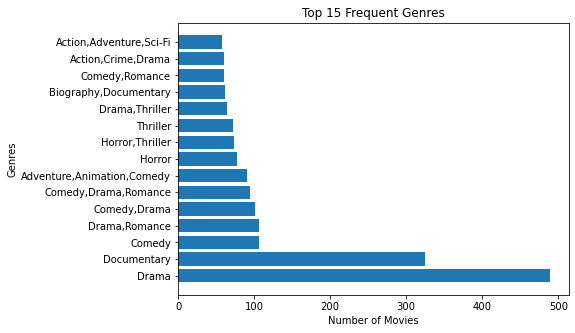

In [68]:
top_15_genres = list(dataset['genres'].value_counts().head(15).index)
top_15_genres_counts = list(dataset['genres'].value_counts().iloc[:15])

bar_chart_title = "Top 15 Frequent Genres"

fig, ax = plt.subplots(figsize=(7,5))

# YOUR CODE HERE
ax.barh(top_15_genres, top_15_genres_counts)
ax.set_title(bar_chart_title)
ax.set_ylabel('Genres')
ax.set_xlabel('Number of Movies');

## 5.2 Bivariate Data Analysis

The pair plot below shows the relationship between the various columns with quantitative data.
 ### Observations
 - All the columns have a positively skewed data apart from `vote_average` and `runtime_minutes` columns which have a slightly normal distribution.
 - There is positive correlation between `profit` and `worldwide_gross` as well as `profit` and `domestic_gross`
 - There is also a slight positive correlation between `profit` and `production_budget`.

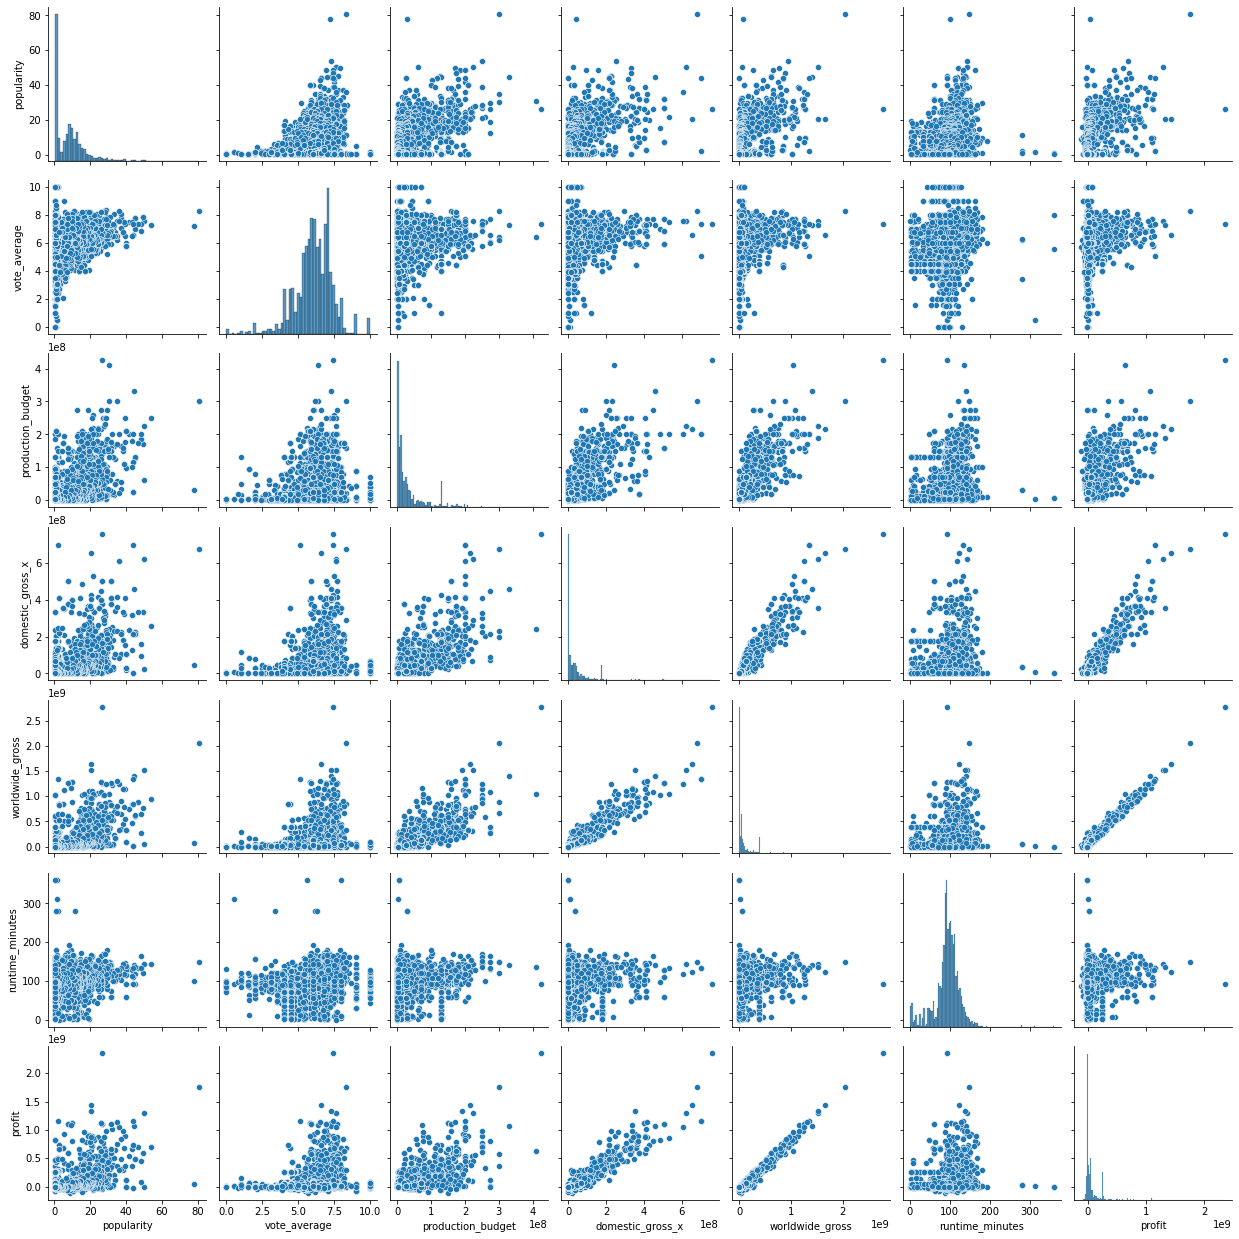

In [69]:
#Create a pairplot using Seaborn
sns.pairplot(dataset);

## Correlation Calculation

The results below confirm the above oservations.

In [70]:
#Evaluating the correlation between 'profit' and 'production_budget'
correlation = dataset['profit'].corr(dataset['production_budget']) 
correlation = round(correlation, 2)
print("The correlation between profit and production_budget is", correlation)

The correlation between profit and production_budget is 0.68


In [71]:
#Evaluating the correlation between 'profit' and 'worldwide_gross'
correlation_1 = dataset['profit'].corr(dataset['worldwide_gross'])
correlation_1 = round(correlation_1, 2)
print("The correlation between profit and worldwide_gross is", correlation_1)

The correlation between profit and worldwide_gross is 0.98


## Other Visualizations

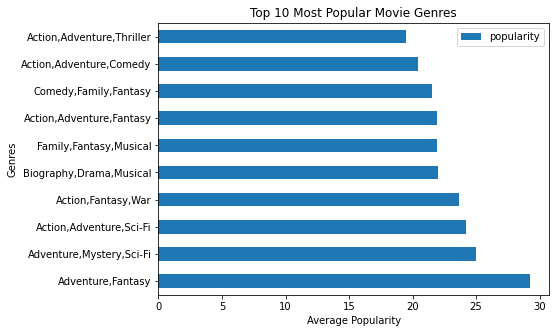

In [72]:
genre_popularity = dataset.groupby('genres')['popularity'].mean() # Group popularity data by genre then get the mean
Top_10_genre_popularity = pd.DataFrame(genre_popularity.sort_values(ascending = False).head(10)) # The data in descending popularity values and select the top 10
Top_10_genre_popularity.plot(kind='barh', figsize=(7,5)) # Create a horizontal bar plot
plt.title('Top 10 Most Popular Movie Genres')
plt.xlabel('Average Popularity')
plt.ylabel('Genres')
plt.show()

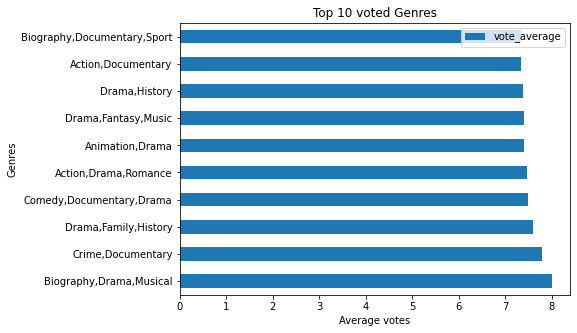

In [73]:
genre_vote = dataset.groupby('genres')['vote_average'].mean() # Group vote_average data by genre then get the mean
Top_10_genre_vote = pd.DataFrame(genre_vote.sort_values(ascending = False).head(10)) # The data in descending popularity values and select the top 10
Top_10_genre_vote.plot(kind='barh', figsize=(7,5))
plt.title('Top 10 voted Genres')
plt.xlabel('Average votes')
plt.ylabel('Genres')
plt.show()

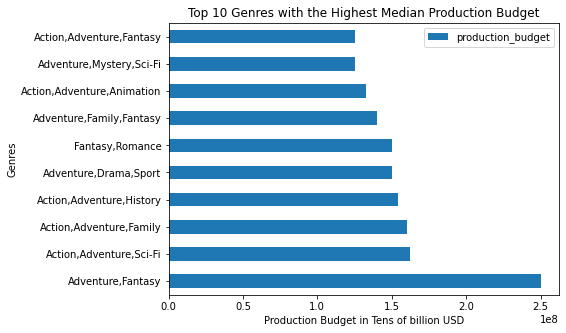

In [74]:
genre_production_budget = dataset.groupby('genres')['production_budget'].median() # Group production_budget data by genre then get the median
Top_10_production_budget = pd.DataFrame(genre_production_budget.sort_values(ascending = False).head(10))  # The data in descending production_budget values and select the top 10
Top_10_production_budget.plot(kind='barh', figsize=(7,5))
plt.title('Top 10 Genres with the Highest Median Production Budget')
plt.xlabel('Production Budget in Tens of billion USD')
plt.ylabel('Genres')
plt.show()

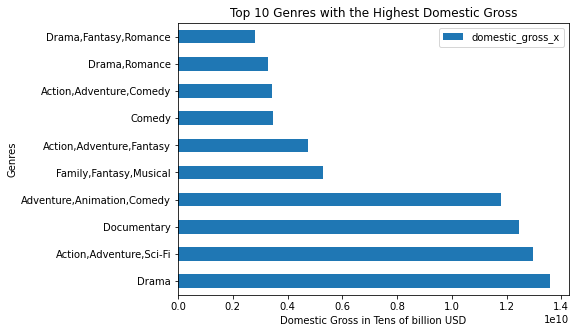

In [75]:
genre_domestic_gross = dataset.groupby('genres')['domestic_gross_x'].sum() # Group domestic_gross_x data by genre then get the sum
Top_10_production_budget = pd.DataFrame(genre_production_budget.sort_values(ascending = False).head(10)) # The data in descending domestic_gross_x values and select the top 10
Top_10_domestic_gross = pd.DataFrame(genre_domestic_gross.sort_values(ascending = False).head(10))
Top_10_domestic_gross.plot(kind='barh', figsize=(7,5))
plt.title('Top 10 Genres with the Highest Domestic Gross')
plt.xlabel('Domestic Gross in Tens of billion USD')
plt.ylabel('Genres')
plt.show();

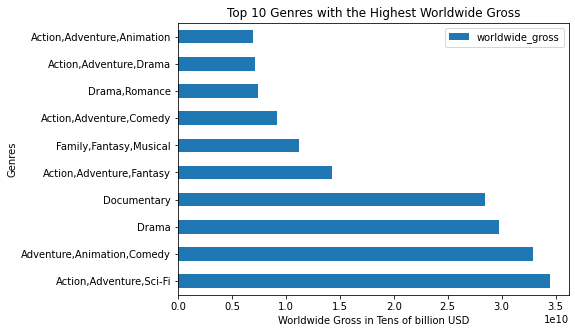

In [76]:
genre_worldwide_gross = dataset.groupby('genres')['worldwide_gross'].sum()  # Group worldwide_gross data by genre then get the sum
Top_10_worldwide_gross = pd.DataFrame(genre_worldwide_gross.sort_values(ascending = False).head(10))# The data in descending worldwide_gross values and select the top 10
Top_10_domestic_gross = pd.DataFrame(genre_domestic_gross.sort_values(ascending = False).head(10))
Top_10_worldwide_gross.plot(kind='barh', figsize=(7,5))
plt.title('Top 10 Genres with the Highest Worldwide Gross')
plt.xlabel('Worldwide Gross in Tens of billion USD')
plt.ylabel('Genres')
plt.show();

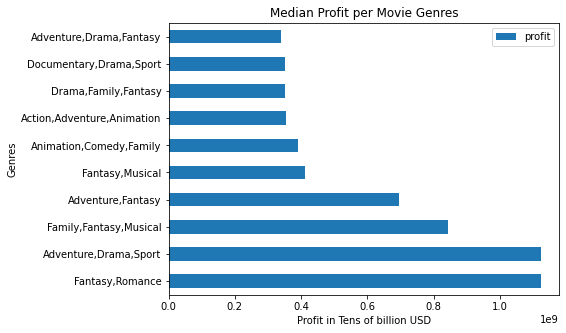

In [77]:
genre_profit = dataset.groupby('genres')['profit'].median()
Top_10_genre_profit = pd.DataFrame(genre_profit.sort_values(ascending = False).head(10))
Top_10_genre_profit.plot(kind='barh', figsize=(7,5))
plt.title('Median Profit per Movie Genres')
plt.xlabel('Profit in Tens of billion USD')
plt.ylabel('Genres')
plt.show();

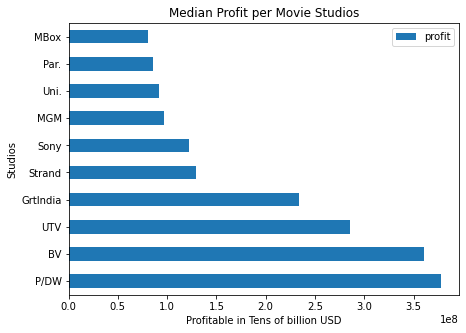

In [78]:
studio_profit = dataset.groupby('studio')['profit'].median()
Top_10_studio_profit = pd.DataFrame(studio_profit.sort_values(ascending = False).head(10))
Top_10_studio_profit.plot(kind='barh', figsize=(7,5))
plt.title('Median Profit per Movie Studios')
plt.xlabel('Profitable in Tens of billion USD')
plt.ylabel('Studios')
plt.show();

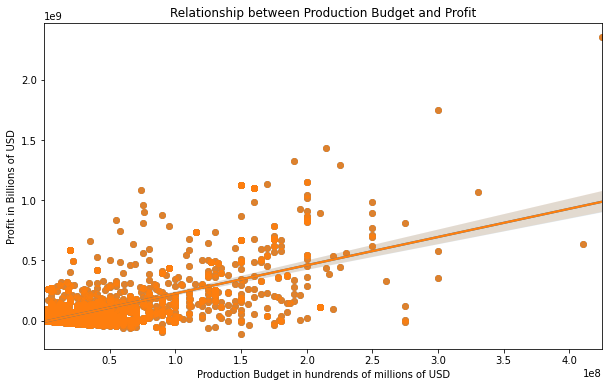

In [79]:
# Create a regression plot using seaborn
fig, ax = plt.subplots(figsize = (10,6))
sns.regplot(x="production_budget", y="profit", data=dataset);
plt.title('Relationship between Production Budget and Profit')
sns.regplot(data=dataset, x="production_budget", y="profit")
plt.ylabel('Profit in Billions of USD')
plt.xlabel('Production Budget in hundrends of millions of USD');

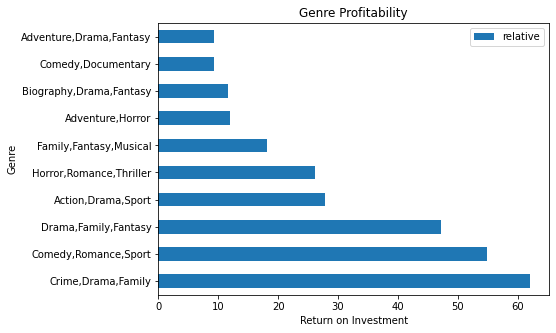

In [80]:
dataset['relative']= dataset['profit']/ dataset['production_budget'] # Add relative column to the dataset by dividing the values in profit column by those in production_budget column
relative_profit = dataset.groupby('genres')['relative'].median()
Top_10_relative_profit = pd.DataFrame(relative_profit.sort_values(ascending = False).head(10))
Top_10_relative_profit.plot(kind='barh', figsize=(7,5))
plt.title('Genre Profitability')
plt.xlabel('Return on Investment')
plt.ylabel('Genre')
plt.show();

## 6. Recommendations

1. The analysis of the top 10 genres with high median profits shows that, to get a profit of more that $400 million, Microsoft should consider the following genre combinations `Fantancy and Romance`, `Adventure,Drama,Sport`, `Adventure,Drama,Sport`, `Adventure,Fantasy` and `Adventure,Fantasy`.



2. To limit their production budget at $150 million per movie to ensure profitability and reduce the risk of making losses.
3. The following top 6 most profitable genre combinations should be considered in creating movies: `Crime,Drama,Family`, `Comedy,Romance,Sport`,  `Drama,Family,Fantasy`, `Action,Drama,Sport`, `Horror,Romance,Thriller`and `Family,Fantasy,Musical`

4. To rank among the top 10 studios, Microsoft shoud aim for profit of slightly over $81 million per movie.